In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
dataset= pd.read_csv('tested.csv')
dataset.shape



(418, 12)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [35]:
# from Sklearn (import)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


In [6]:
# now Explore dataset
selected_columns = ['Pclass', 'Survived', 'Sex','Age','SibSp','Parch','Fare','Embarked']
dataset[selected_columns].describe()

,Pclass,Survived,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# Now explore data
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Now explore data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [31]:
# Now fill missing values and preprocess the data (data format:int)
mean_age=dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
mean_fare=dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
# map the values to integers
dataset['Sex'] = dataset['Sex'].replace({'male': 1, 'female': 0})
dataset['Embarked'] = dataset['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
#drop unnecessary column

dataset


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34,0,0,7,2
1,893,1,3,0,47,1,0,7,0
2,894,0,2,1,62,0,0,9,2
3,895,0,3,1,27,0,0,8,0
4,896,1,3,0,22,1,1,12,0
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,30,0,0,8,0
414,1306,1,1,0,39,0,0,108,1
415,1307,0,3,1,38,0,0,7,0
416,1308,0,3,1,30,0,0,8,0


In [32]:
#no of passengers survived and died
dataset['Survived'].value_counts()


0    266
1    152
Name: Survived, dtype: int64

In [20]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    int64 
 2   Pclass       418 non-null    int64 
 3   Name         418 non-null    object
 4   Sex          418 non-null    int64 
 5   Age          418 non-null    int32 
 6   SibSp        418 non-null    int64 
 7   Parch        418 non-null    int64 
 8   Ticket       418 non-null    object
 9   Fare         418 non-null    int32 
 10  Cabin        91 non-null     object
 11  Embarked     418 non-null    int64 
dtypes: int32(2), int64(7), object(3)
memory usage: 36.0+ KB


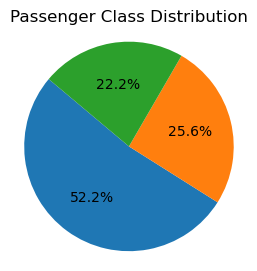

In [21]:
plt.figure(figsize=(3, 3))
plt.pie(dataset['Pclass'].value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Passenger Class Distribution')
plt.axis('equal') 
plt.show();

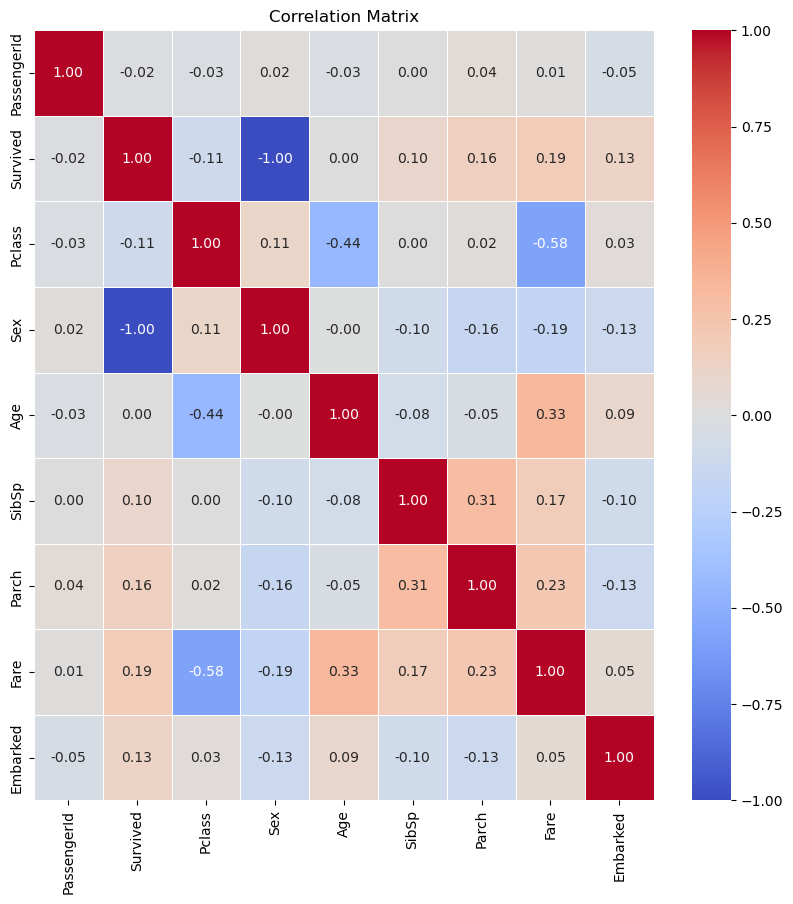

In [22]:
# heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

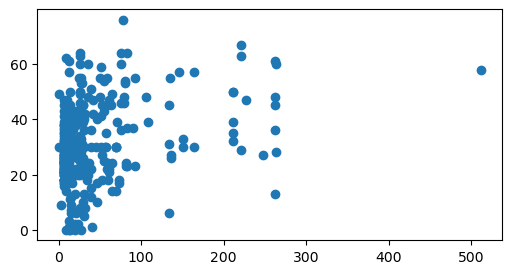

In [23]:
from pandas import DataFrame
X =DataFrame(dataset ,columns=["Fare"])
y =DataFrame(dataset ,columns=["Age"])
plt.figure(figsize=(6, 3))
plt.scatter(X,y)

In [55]:
# Define the features (X) and target variable (y)
X = dataset.drop(columns=['Survived'])  # Features
y = dataset['Survived']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_logistic*100))

# Print classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))



Logistic Regression Accuracy: 100.00%
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



C:\Users\Khansa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# Apply Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions with Random Forest Classifier
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy for Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy: {:.2f}%".format(accuracy_rf*100))

# Print classification report for Random Forest Classifier
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))




Random Forest Accuracy: 100.00%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



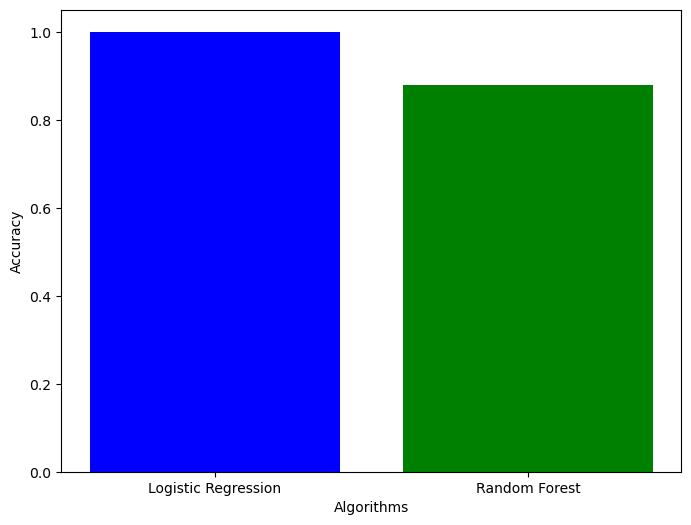

In [56]:
# Corresponding accuracy values
accuracies = [accuracy_logistic, accuracy_rf]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()
